# Porównanie struktur QuadTree i KdTree

In [1]:
import quad_tree
import quad_tree_vis
import kd_tree
import kd_tree_visualiser
from Point import Point
from Rectangle import Rectangle
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import tests.generate_tests as gt

## Testy poprawności implementacji:

In [2]:
# umieścić testy poprawności

## Porównanie wydajnościowe struktur QuadTree i KdTree

In [2]:

# Zwiększ szerokość wyświetlanych kolumn
pd.set_option('display.max_columns', None)  # Zwiększa liczbę wyświetlanych kolumn
pd.set_option('display.width', 1000)

Funkcje pomocnicze

In [25]:
import pandas as pd
from time import time

def measure_time(function, *args, **kwargs):
    """Pomocnicza funkcja do mierzenia czasu wykonania."""
    start = time()
    result = function(*args, **kwargs)
    end = time()
    return result, end - start

def show_time_table(test_set, rectangle = Rectangle(Point((30,30)), Point((70,70))), output_file=None, title="Benchmark"):
    """
    Wyświetla tabelę z czasami budowy i wyszukiwania dla KDTree i QuadTree,
    z opcją zapisu do pliku CSV.
    
    Args:
        test_set (list): Lista zbiorów testowych.
        rectangle: Prostokąt do wyszukiwania.
        output_file (str, optional): Ścieżka do pliku CSV, gdzie tabela zostanie zapisana.
        title (str): Tytuł tabeli.
    """
    build_times = []
    search_times = []
    sizes = []

    for zbior_test in test_set:
        liczba_punktow = len(zbior_test)
        sizes.append(liczba_punktow)

        # Mierzenie czasu dla KDTree
        kdtree, build_kd_time = measure_time(kd_tree.KdTree, zbior_test, len(zbior_test[0]))
        _, search_kd_time = measure_time(kdtree.find_points_in_region, rectangle)

        # Mierzenie czasu dla QuadTree
        Q_tree, build_qt_time = measure_time(quad_tree.build_quadtree, zbior_test)
        _, search_qt_time = measure_time(Q_tree.search, rectangle, [])

        # Dodanie wyników
        build_times.append([build_kd_time, build_qt_time])
        search_times.append([search_kd_time, search_qt_time])

    # Tworzenie DataFrame z zamienionymi kolumnami
    df = pd.DataFrame(
        data={
            "Liczba punktów": sizes,
            "KDTree Build [s]": [bt[0] for bt in build_times],
            "QuadTree Build [s]": [bt[1] for bt in build_times],  
            "KDTree Search [s]": [st[0] for st in search_times],  
            "QuadTree Search [s]": [st[1] for st in search_times],
        }
    )

    # Wyświetlanie tytułu i tabeli
    print(f"\n{title}")
    print(df)

    # Zapis do pliku CSV, jeśli podano ścieżkę
    if output_file:
        df.to_csv(output_file, index=False)
        # print(f"\nTabela została zapisana do pliku: {output_file}")
    return df


In [23]:
import matplotlib.pyplot as plt

def show_graphs(df, title):
    # Tworzenie wykresów w jednym rzędzie, dwóch kolumnach
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Tytuł całkowity wykresu
    fig.suptitle(title)
    
    # Pierwszy wykres: Czas konstrukcji
    ax1.set_title("Czas konstrukcji")
    ax1.plot(df["Liczba punktów"], df["KDTree Build [s]"], label="KDTree", marker="o")
    ax1.plot(df["Liczba punktów"], df["QuadTree Build [s]"], label="QuadTree", marker="o")
    ax1.set_xlabel("Liczba punktów")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.legend()
    
    # Drugi wykres: Czas przeszukiwania
    ax2.set_title("Czas przeszukiwania")
    ax2.plot(df["Liczba punktów"], df["KDTree Search [s]"], label="KDTree", marker="o")
    ax2.plot(df["Liczba punktów"], df["QuadTree Search [s]"], label="QuadTree", marker="o")
    ax2.set_xlabel("Liczba punktów")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.legend()
    
    # Wyświetlanie wykresu
    plt.show()

1. Losowy rozkład punktow


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.148620            0.195444           0.001253             0.002845
1           20000          0.539890            0.258265           0.002079             0.006619
2           30000          0.900014            0.597330           0.002930             0.008343
3           40000          0.973172            0.818807           0.003556             0.010672
4           50000          1.279393            1.003942           0.004220             0.013619
5           60000          1.543496            1.179878           0.004328             0.016408
6           70000          1.760793            1.966055           0.005162             0.019703
7           80000          2.142849            1.643390           0.005744             0.022438
8           90000          2.479642            1.863259           0.006692             0.026196
9          100000          2.

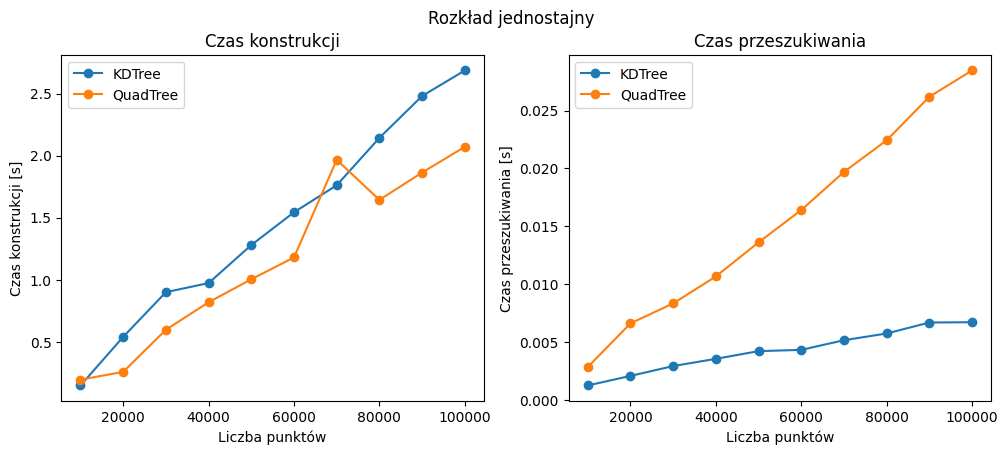

In [26]:
df1 = show_time_table([gt.generate_uniform_distribution(10000*n,0,100,0,100) for n in range(1,11)],output_file="c1.csv")
show_graphs(df1, "Rozkład jednostajny")

2. Rozkład normalny


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.120712            0.113960           0.003156             0.012555
1           20000          0.253413            0.248400           0.005878             0.029307
2           30000          1.003214            0.607358           0.008039             0.043810
3           40000          1.125217            0.848673           0.010355             0.058463
4           50000          1.455890            1.068027           0.019367             0.076117
5           60000          1.746620            1.876626           0.016348             0.090892
6           70000          2.195118            1.671018           0.019593             0.104964
7           80000          2.537556            1.949879           0.024861             0.123754
8           90000          2.920670            2.200018           0.026866             0.138955
9          100000          3.

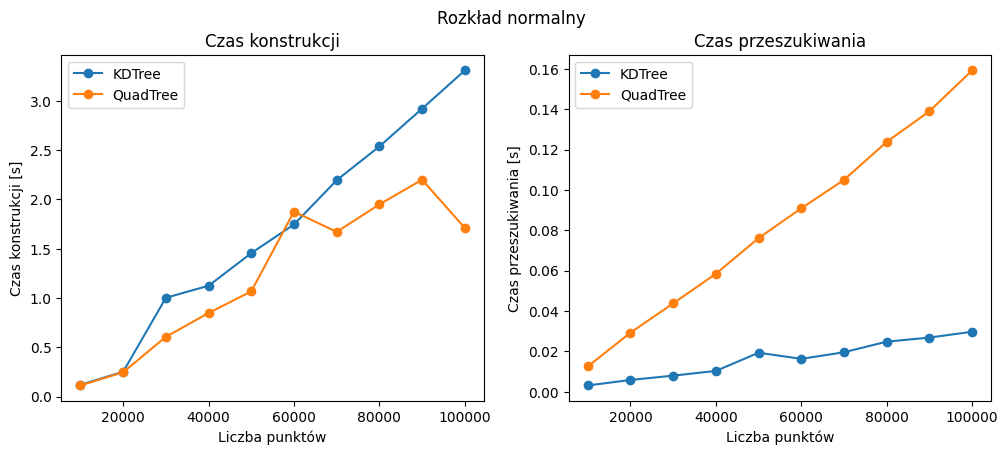

In [27]:
df2 = show_time_table([gt.generate_standard_distribution(10000*n,50,50,10,10) for n in range(1,11)],output_file="c2.csv")
show_graphs(df2, "Rozkład normalny")

3.1 Dwa skupiska


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.141276            0.137363           0.000072             0.000039
1           20000          0.293883            0.292936           0.000092             0.000036
2           30000          0.446349            3.424501           0.000124             0.000053
3           40000          0.527196            1.941293           0.000151             0.000044
4           50000          0.693908            2.259476           0.000133             0.000070
5           60000          2.458575            0.991137           0.000123             0.000049
6           70000          2.620383            1.161799           0.000119             0.000051
7           80000          4.711518            1.353846           0.000136             0.000059
8           90000          3.211411            3.261132           0.000133             0.000083
9          100000          3.

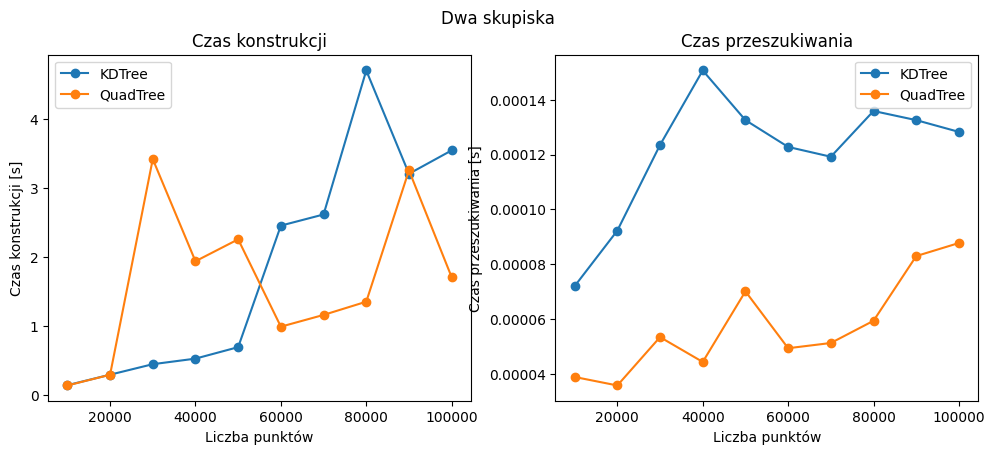

In [30]:
df31 = show_time_table([gt.generate_clasters(10000*n,2,0,100,0,100) for n in range(1,11)],output_file="c31.csv")
show_graphs(df31, "Dwa skupiska")

3.2 Trzy skupiska


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.148251            0.147309           0.000007             0.000005
1           20000          0.264717            1.699276           0.000089             0.000043
2           30000          0.445240            0.486612           0.000120             0.000040
3           40000          1.972980            0.670928           0.000136             0.000041
4           50000          2.199386            2.297871           0.000122             0.000038
5           60000          0.910828            2.478619           0.000104             0.000043
6           70000          2.735117            1.186535           0.000146             0.000043
7           80000          2.872340            3.062843           0.000117             0.000044
8           90000          3.270875            1.562042           0.000113             0.000042
9          100000          5.

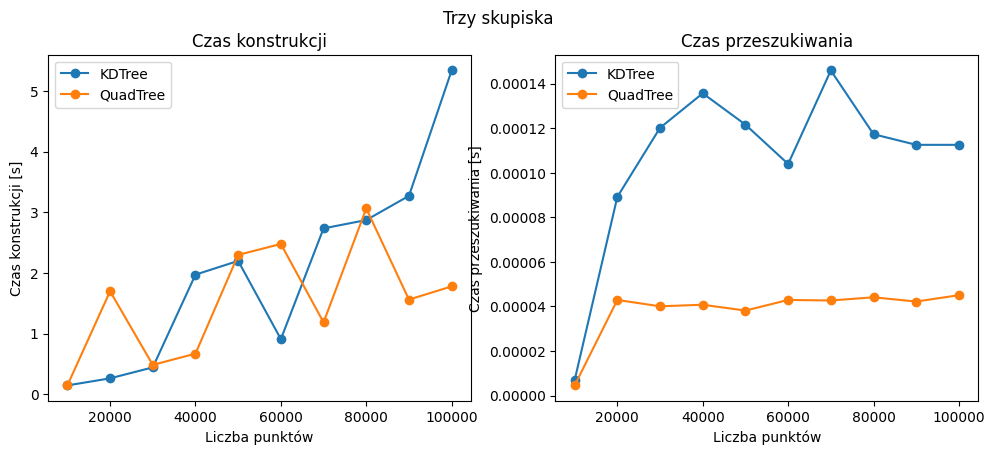

In [31]:
df32=show_time_table([gt.generate_clasters(10000*n,3,0,100,0,100) for n in range(1,11)],output_file="c32.csv")
show_graphs(df32, "Trzy skupiska")

3.3 Dwa skupiska z wartościami odstającymi


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10050          0.138820            0.156101           0.000069             0.000044
1           20050          0.285186            0.339035           0.000077             0.000077
2           30050          1.767182            0.503592           0.000089             0.000049
3           40050          1.942645            0.729876           0.000137             0.000087
4           50050          2.180273            0.913476           0.000102             0.000102
5           60050          2.422130            2.618062           0.000118             0.000062
6           70050          2.782673            1.292392           0.000105             0.000083
7           80050          2.938115            1.490425           0.000109             0.000097
8           90050          4.968475            1.701134           0.000129             0.000071
9          100050          3.

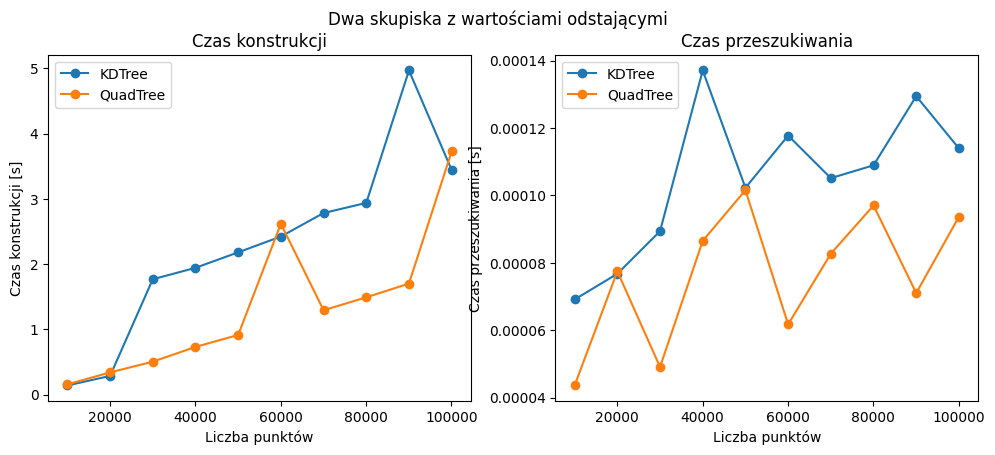

In [32]:
df33=show_time_table([gt.add_outliners(50, gt.generate_clasters(10000*n,2,0,100,0,100),0,100,0,100) for n in range(1,11)],output_file="c33.csv")
show_graphs(df33, "Dwa skupiska z wartościami odstającymi")

4. Rozkład w kształcie okręgu


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.568007            0.129537           0.001276             0.006135
1           20000          0.768744            0.290318           0.002448             0.013711
2           30000          0.987522            1.003351           0.003129             0.019912
3           40000          1.247844            1.258993           0.005823             0.027259
4           50000          1.497606            1.456889           0.005754             0.035125
5           60000          1.747956            1.670197           0.006949             0.041848
6           70000          1.894460            1.849559           0.007729             0.050013
7           80000          3.233137            1.162129           0.008635             0.057527
8           90000          3.415649            2.367283           0.009466             0.067277
9          100000          2.

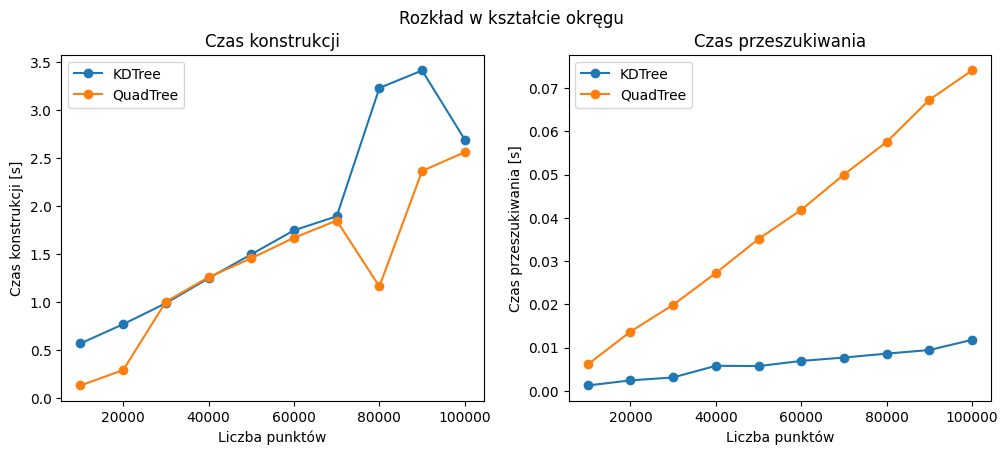

In [37]:
df4 = show_time_table([gt.generate_random_on_circle(10000*n,70,90) for n in range(1,11)],Rectangle(Point((0,-70)),Point((100,100))),output_file="c4.csv")
show_graphs(df4, "Rozkład w kształcie okręgu")

5. Rozkład krzyżowy


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.114937            0.176634           0.002720             0.002091
1           20000          0.240122            0.393433           0.005329             0.004515
2           30000          3.206940            1.204324           0.008271             0.007004
3           40000          1.158717            1.581508           0.012104             0.009781
4           50000          1.411442            1.678699           0.014315             0.011769
5           60000          1.623241            2.129748           0.017133             0.013399
6           70000          1.850968            2.740437           0.021357             0.016439
7           80000          3.039436            1.951536           0.022163             0.019240
8           90000          3.167953            3.243842           0.024799             0.020568
9          100000          3.

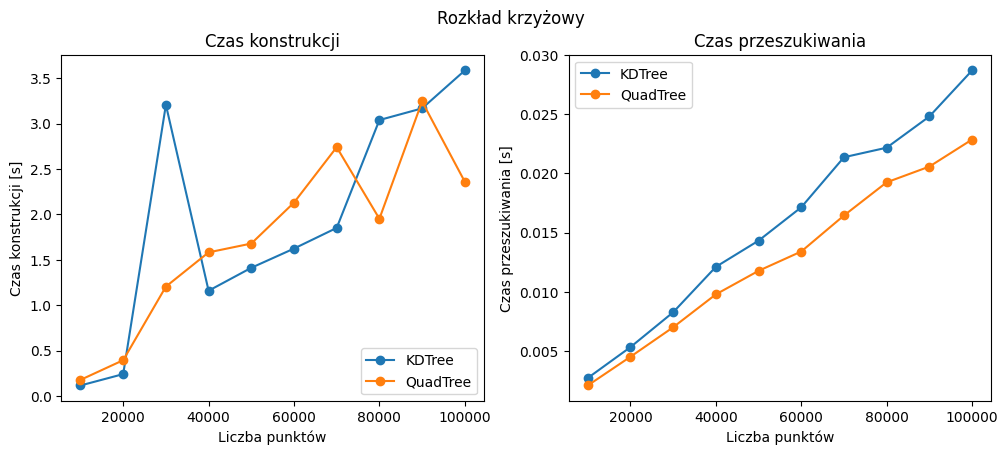

In [36]:
df5 = show_time_table([gt.generate_cross_on_axes(10000*n,-100,100,-100,100) for n in range(1,11)],Rectangle(Point((10,-20)),Point((60,30))),output_file="c5.csv")
show_graphs(df5, "Rozkład krzyżowy")

6. Rozkład na obwodzie prostokąta


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.135445            0.166626           0.004526             0.002278
1           20000          0.770595            0.906572           0.008201             0.004621
2           30000          1.021912            0.599217           0.009450             0.007251
3           40000          1.225964            1.479117           0.013116             0.009481
4           50000          2.305053            1.069256           0.023351             0.011409
5           60000          2.545692            1.265624           0.025524             0.013956
6           70000          2.735419            2.301754           0.022160             0.016069
7           80000          2.093686            2.575985           0.032333             0.017937
8           90000          2.346813            2.878498           0.037726             0.021548
9          100000          3.

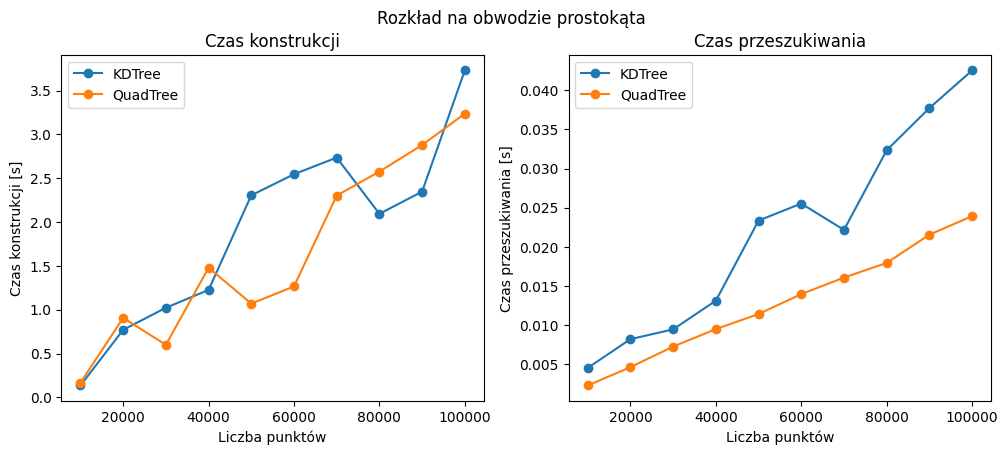

In [38]:
df6 = show_time_table([gt.generate_random_points_on_rectangle(10000*n,0,100,0,100) for n in range(1,11)],Rectangle(Point((10,-20)),Point((60,30))),output_file="c6.csv")
show_graphs(df6, "Rozkład na obwodzie prostokąta")

7. Rozkład wzdłuż lini


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.102493            0.134469           0.002641             0.007107
1           20000          0.210168            0.825093           0.003788             0.016771
2           30000          0.911430            0.447366           0.005131             0.023629
3           40000          1.738084            0.601032           0.006798             0.031549
4           50000          2.008797            0.779047           0.008955             0.041463
5           60000          2.314629            0.946495           0.010842             0.050427
6           70000          2.508993            1.101709           0.012613             0.057621
7           80000          2.833167            2.198957           0.012484             0.067653
8           90000          2.079547            2.317434           0.013891             0.075171
9          100000          2.

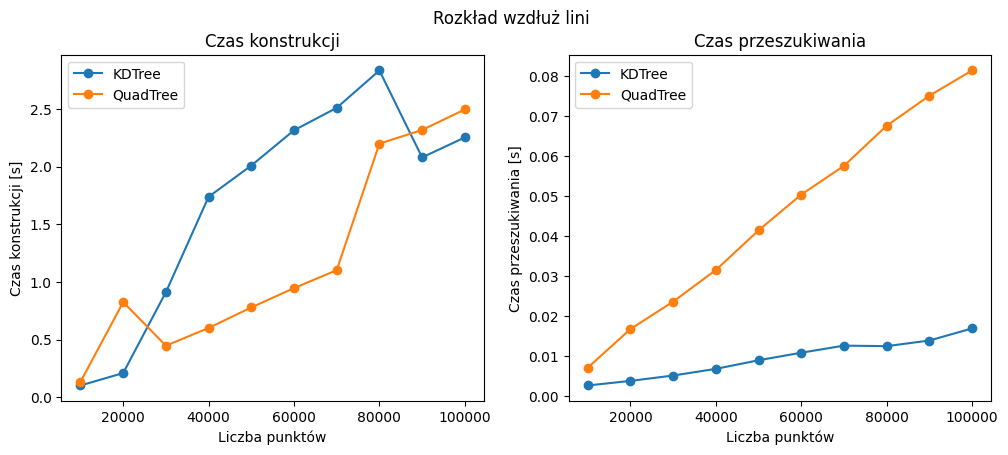

In [39]:
df7 = show_time_table([gt.generate_random_on_line(10000*n,1,10,0,100,10) for n in range(1,11)],Rectangle(Point((10,10)),Point((60,100))),output_file="c7.csv")
show_graphs(df7, "Rozkład wzdłuż lini")

8. Rozkład "Siatka"


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.082958            0.095548           0.001188             0.002004
1           20164          0.158854            0.357566           0.001655             0.004375
2           30276          0.615341            0.530288           0.001746             0.005690
3           40000          0.869627            0.691775           0.002286             0.007036
4           50176          1.105672            0.862678           0.002656             0.008945
5           60025          1.736038            1.059288           0.002730             0.011461
6           70225          1.574574            1.268292           0.003171             0.012795
7           80089          1.756399            1.425343           0.003238             0.014977
8           90000          1.966930            1.604154           0.003474             0.016490
9          100489          2.

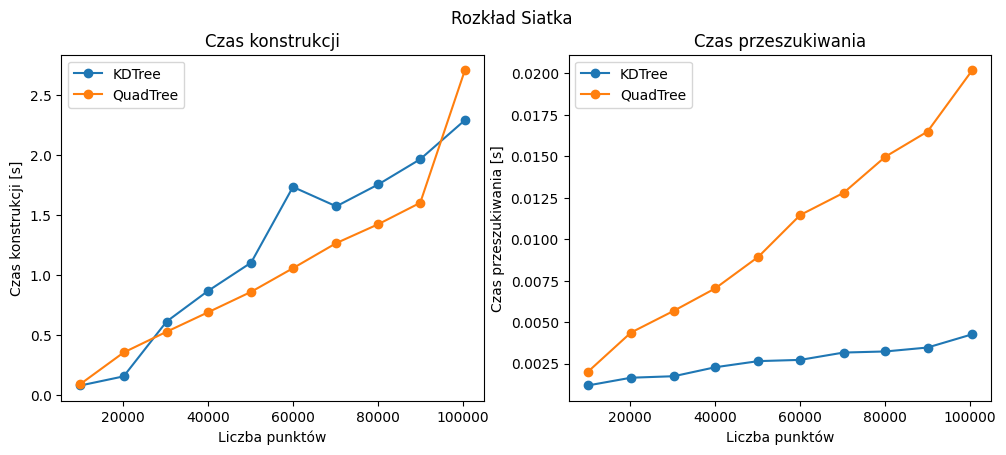

In [44]:
import math
df8 = show_time_table([gt.generate_grid_normal(math.ceil(100*  math.sqrt(n)),0,1000,0,1000) for n in range(1,11)],Rectangle(Point((300,300)), Point((700,700))),output_file="c8.csv")
show_graphs(df8, "Rozkład Siatka")

## Wizualizacje tworzenia struktur